In [64]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL

from tensorflow import keras
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from keras.models import load_model
import pathlib

In [53]:
#Pega o diretório com as imagens usando Pathlib
data_dir = pathlib.Path("C:/Users/davic/Downloads/flower_images") #Urls "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"  https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset/data
 
#Define o tamanho dos batchs e o tamnaho padrão das imagens / Define qual parte das imagens será de Treinamento e qual será de Validação 
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
class_names = train_ds.class_names
num_classes = len(class_names)

#Insere os dados na memória cache e sobrepõe o pré-processamento dos dados e a execução do modelo durante a fase de treinamento 
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#Faz o aumento do Dataset modificando as imagens existentes 
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

#Cria as camadas da Rede Neural Convolucional junto das camadas Fully-Conected(Dense) usando o Sequential do Keras
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #Transforma os valores dos pixels da imagem de 1/255 para 0/1
  layers.Conv2D(16, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 16 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.Conv2D(32, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 32 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.Conv2D(64, 3, padding='same', activation='relu'), #Faz a convolução das imagens com 64 filtros deixando elas com o mesmo tamanho e utilizando da função de ativação Relu
  #layers.BatchNormalization(), #Faz a normalização das imagens fazendo uma relação entre a média e a variância dos valores das imagens
  layers.MaxPooling2D(), #Diminui o tamanho da imagem utilizando do MaxPooling de tamanho 2x2
  layers.Flatten(), #Vetoriza as matrizes dos tensores
  layers.Dropout(0.2), #Desativa aleatóriamente alguns neurônios 
  layers.Dense(128, activation='relu'), #Primeira camada Fully-Connected 
  layers.Dense(num_classes, activation='softmax')#Camada de saída da Rede, Onde cada  neurônio é uma classe 
])
#Define qual será a função de perda e qual será o modelo de optimização do Back-propagation
model.compile(optimizer='adam', #Utiliza do algoritmo otimizador Adaptative Moment estimation para as camadas convolucionais 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #Utiliza da função de perda Cross Entropy para a parte Fully-Connected da rede
              metrics=['accuracy'])
model.build((None, 180, 180, 3)) #Executa as camadas 
model.summary(expand_nested=True) #Printa como estão alocadas as camadas da rede 

Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Found 4999 files belonging to 5 classes.
Using 999 files for validation.


c:\Users\davic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip_9 (RandomFlip) │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_rotation_9          │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_zoom_9 (RandomZoom) │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_9 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Faz o treinamento da rede utilizando do modelo criado 
epochs=25
history = model.fit(
  train_ds, #Dataset de treinamento
  validation_data=val_ds, #Dataset de validação
  epochs=epochs #Número de épocas 
)

Epoch 1/25


c:\Users\davic\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.4045 - loss: 1.4020 - val_accuracy: 0.5736 - val_loss: 1.1027
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 0.5658 - loss: 1.0745 - val_accuracy: 0.5726 - val_loss: 1.0464
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.6064 - loss: 0.9906 - val_accuracy: 0.6316 - val_loss: 0.9384
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.6269 - loss: 0.9578 - val_accuracy: 0.6256 - val_loss: 0.9103
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 221ms/step - accuracy: 0.6492 - loss: 0.8952 - val_accuracy: 0.6637 - val_loss: 0.8587
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.6736 - loss: 0.8275 - val_accuracy: 0.6827 - val_loss: 0.8288
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.6909 - loss: 0.7827 - val_accuracy: 0.6757 - val_loss: 0.8476
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.7188 - loss: 0.7280 - val

In [55]:
model.save('Model_Padrão2.keras')

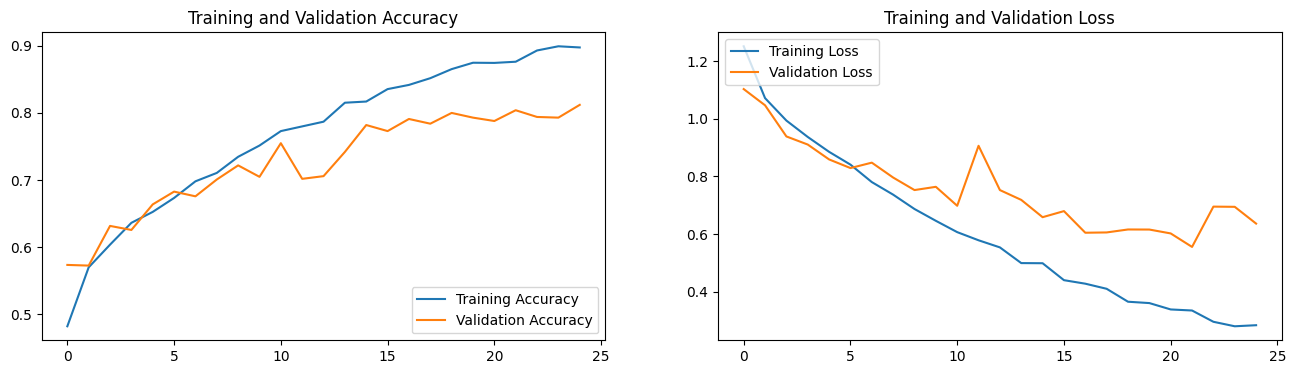

In [57]:
#Faz um gráfico utilizando da Acurácia e da Perda entre os dados de Treinamento e os Dados de Validação
plt.figure(figsize=(16, 4)) #Tamanho da imagem

plt.subplot(1, 2, 1) #Tamanho da Sub-Imagem da Esquerda
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy') #Dados de Acurácia dos dados de treino para sub-imagem da esquerda
plt.plot(range(epochs),  history.history['val_accuracy'], label='Validation Accuracy') #Dados de Acurácia dos dados de validação para sub-imagem da esquerda
plt.legend(loc='lower right') #Local da legenda da sub-imagem da esquerda
plt.title('Training and Validation Accuracy') #Título da sub-imagem da esquerda

plt.subplot(1, 2, 2) #Tamanho da Sub-Imagem da Direita
plt.plot(range(epochs), history.history['loss'], label='Training Loss') #Dados da Perda dos dados de treino para sub-imagem da direita
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss') #Dados da Perda dos dados de validação para sub-imagem direita
plt.legend(loc='upper left') #Local da legenda da sub-imagem da direita
plt.title('Training and Validation Loss') #Título da sub-imagem da direita 
plt.show()

In [ ]:
roses = list(data_dir.glob('roses/*')) #Carrega todas as imagens das rosas do Dataset em uma lista
dandelion = list(data_dir.glob('dandelion/*')) #Carrega todas as imagens dos dentes de leão do Dataset em uma lista
tulips = list(data_dir.glob('tulips/*')) #Carrega todas as imagens das tulipas do Dataset em uma lista
sunflowers = list(data_dir.glob('sunflowers/*')) #Carrega todas as imagens dos girassoís do Dataset em uma lista
daisy = list(data_dir.glob('daisy/*')) #Carrega todas as imagens das margaridas do Dataset em uma lista
im = PIL.Image.open(dandelion[130])

In [68]:
orchids = list(data_dir.glob('Orchid/*')) #Carrega todas as imagens das rosas do Dataset em uma lista
lotus = list(data_dir.glob('Lotus/*')) #Carrega todas as imagens dos dentes de leão do Dataset em uma lista
tulips = list(data_dir.glob('Tulip/*')) #Carrega todas as imagens das tulipas do Dataset em uma lista
sunflowers = list(data_dir.glob('Sunflower/*')) #Carrega todas as imagens dos girassoís do Dataset em uma lista
lillys = list(data_dir.glob('Lilly/*')) #Carrega todas as imagens das margaridas do Dataset em uma lista
im = PIL.Image.open(lillys[110])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Essa imagem pertence a classe Lilly com 99.86 porcento de predicão.


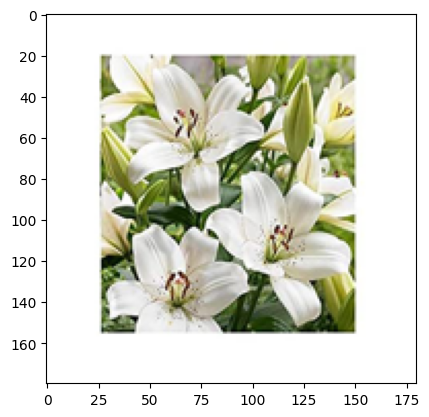

In [70]:

#im = PIL.Image.open('C:/Users/davic/Downloads/Tulips.JPEG') #Carrega uma das imagens em uma variável
plt.imshow(im) #Printa a imagem
im = im.resize((180,180)) #Rescala a Imagem no formato 180x180
im_array = np.array(im) #Vetoriza a imagem no formato 180x180
im_array = np.expand_dims(im_array, axis = 0) #Rescalona a imagem no formato 180x180x1 para ficar no estilo do Keras/TEnsorFlow
score = model.predict(im_array) #Faz a predição da imagem

print("Essa imagem pertence a classe {} com {:.2f} porcento de predicão.".format(class_names[np.argmax(score)], 100 * np.max(score))) #Printa o score da imagem dizendo a qual classe ela pertence 